<a href="https://colab.research.google.com/github/utkarshg1/Test1/blob/main/Regression_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Change runtime to GPU
1. Rumtime > Change Runtime Type

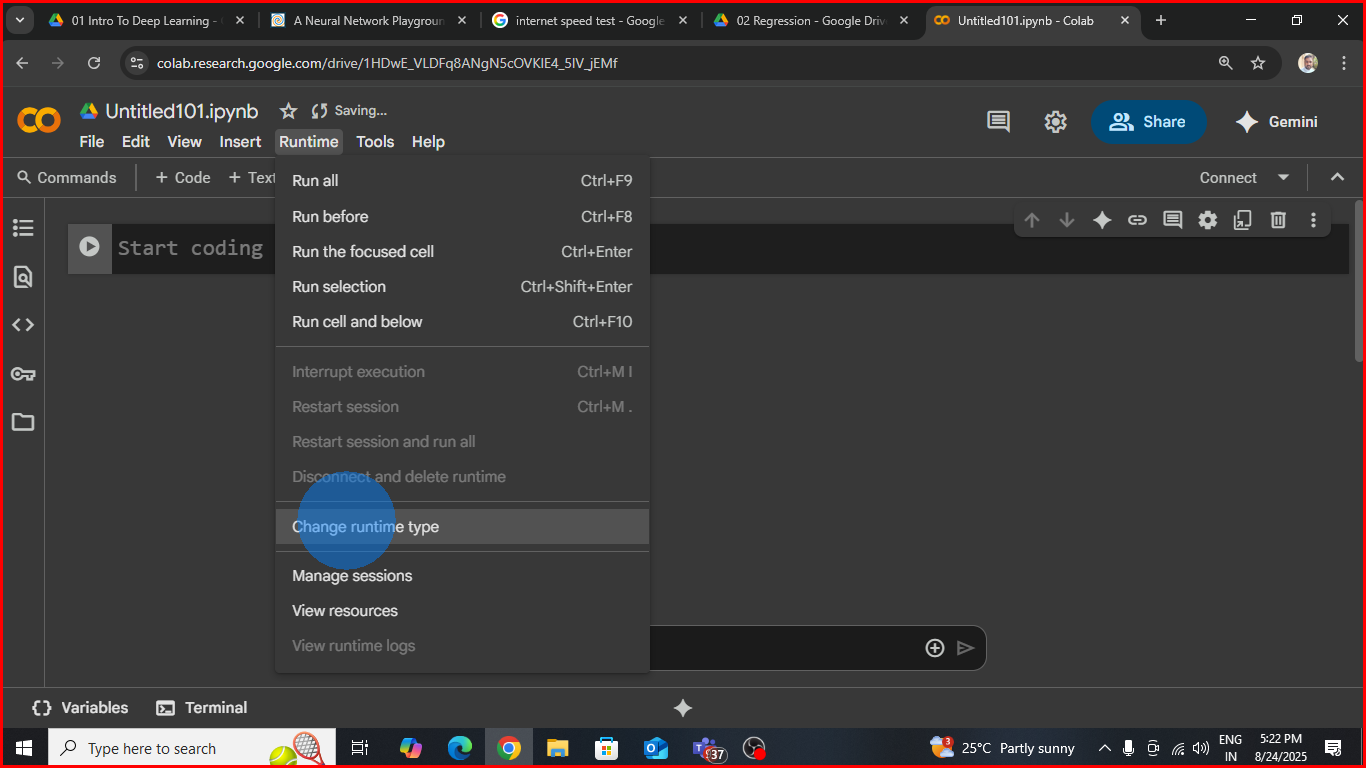

2. Choose T4 GPU

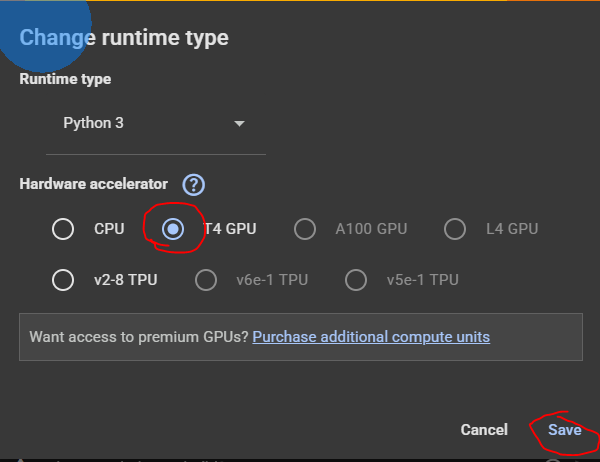

In [3]:
from warnings import filterwarnings

filterwarnings("ignore")

In [1]:
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv


# Step 1 - Data Ingestsion

In [2]:
import pandas as pd
df = pd.read_csv(url1)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### Featuer names
1. AT - Atmospheric Temperature in degree celsius
2. V - Vacuum Pressure in Pascals
3. AP - Atmosphric pressure in pascals
4. RH - Relative Humidity in Percentage
5. Target = PE - Power Output in Mega Watts

# Step 2 - Perform basic data quality checks

In [4]:
df.shape

(9568, 5)

In [5]:
df.duplicated().sum()

np.int64(41)

In [6]:
# Drop the duplicates
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(9527, 5)

In [7]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9527 non-null   float64
 1   V       9527 non-null   float64
 2   AP      9527 non-null   float64
 3   RH      9527 non-null   float64
 4   PE      9527 non-null   float64
dtypes: float64(5)
memory usage: 372.3 KB


# Step 3 - Seperate X and Y(PE)

In [9]:
X = df.drop(columns=["PE"])
Y = df["PE"]

In [10]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [11]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


# Step 4 - Apply preprocessing on X

In [12]:
X.dtypes

,0
AT,float64
V,float64
AP,float64
RH,float64


In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [14]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [15]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


In [16]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

# Apply train test split

In [17]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.2, random_state=42
)

In [18]:
xtrain.head()

,AT,V,AP,RH
5695,-0.152905,0.324507,0.089713,1.817999
7300,-1.497611,-1.153542,0.323712,0.908830
9066,-0.885038,-0.954892,0.293410,0.988245
6424,1.398679,1.223949,-0.479290,-1.082031
6773,-0.824586,-0.942279,0.796758,1.506499


In [19]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [20]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [21]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [22]:
xtrain.shape

(7621, 4)

In [23]:
xtest.shape

(1906, 4)

In [25]:
xtrain.shape[1]

4

# Step 6 - Build a neural network

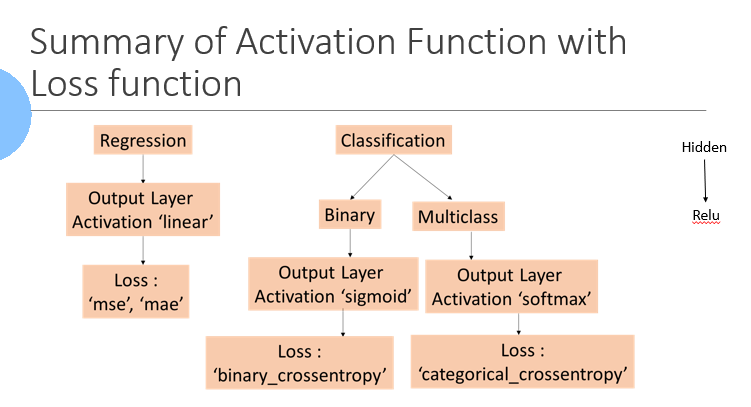

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [26]:
model = Sequential(
    [
        Input(shape=(xtrain.shape[1], )),
        Dense(units=8, activation="relu"),
        Dense(units=4, activation="relu"),
        Dense(units=1, activation="linear")
    ]
)

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss="mse", optimizer="adam", metrics=["mae"])

In [29]:
# Fit the model
history = model.fit(xtrain, ytrain, epochs=60, validation_split=0.1)

Epoch 1/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 205086.4062 - mae: 452.4817 - val_loss: 198073.5000 - val_mae: 444.4106
Epoch 2/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 194558.8438 - mae: 440.1497 - val_loss: 172287.4219 - val_mae: 412.2821
Epoch 3/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 163563.0000 - mae: 400.0489 - val_loss: 122620.1406 - val_mae: 337.7161
Epoch 4/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 112375.0078 - mae: 319.2809 - val_loss: 75344.3906 - val_mae: 248.5141
Epoch 5/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 67676.5000 - mae: 234.3441 - val_loss: 44136.9062 - val_mae: 189.1024
Epoch 6/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 38698.6406 - mae: 176.0402 - val_loss: 24807.9980 - val_mae: 136.6310
Epoch 7/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21373.6562 - mae: 125.3831 - val_loss: 15521.0762 - val_mae: 105.9554
Epoch 8/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13434.8408 - mae: 98.6

In [33]:
history.history["loss"]

[203489.609375,
 189017.296875,
 151156.96875,
 100196.78125,
 59712.15234375,
 33245.85546875,
 18683.08984375,
 12294.7392578125,
 8916.2177734375,
 6435.99365234375,
 4644.7744140625,
 3439.333984375,
 2619.4423828125,
 2055.5341796875,
 1643.4940185546875,
 1332.5684814453125,
 1083.257080078125,
 878.7619018554688,
 703.7813720703125,
 553.623779296875,
 428.0978698730469,
 324.1240539550781,
 243.4449920654297,
 186.2005157470703,
 148.2976837158203,
 121.27056121826172,
 99.95276641845703,
 82.69456481933594,
 68.67984771728516,
 57.022216796875,
 48.02811050415039,
 41.14104080200195,
 35.89119338989258,
 32.12590789794922,
 29.113372802734375,
 27.07830810546875,
 25.46987533569336,
 24.3884220123291,
 23.538053512573242,
 22.979530334472656,
 22.57501220703125,
 22.17595863342285,
 21.784061431884766,
 21.720592498779297,
 21.596750259399414,
 21.356048583984375,
 21.13545799255371,
 21.186084747314453,
 21.253013610839844,
 21.009429931640625,
 20.989696502685547,
 20.974067

In [34]:
history.history["val_loss"]

[198073.5,
 172287.421875,
 122620.140625,
 75344.390625,
 44136.90625,
 24807.998046875,
 15521.076171875,
 11128.66796875,
 8118.388671875,
 5821.32568359375,
 4250.13623046875,
 3204.969482421875,
 2487.577880859375,
 1989.3731689453125,
 1618.49755859375,
 1323.172119140625,
 1079.287353515625,
 875.6563720703125,
 700.037353515625,
 545.5873413085938,
 416.0464172363281,
 311.8678894042969,
 231.81802368164062,
 177.30987548828125,
 143.3714141845703,
 115.39912414550781,
 93.9588623046875,
 76.86734008789062,
 62.57053756713867,
 51.20889663696289,
 43.09520721435547,
 35.96806716918945,
 31.82758140563965,
 28.25974464416504,
 26.079622268676758,
 23.984710693359375,
 22.936363220214844,
 21.449649810791016,
 20.78949737548828,
 20.4195613861084,
 19.77515411376953,
 19.867280960083008,
 19.69957160949707,
 19.391523361206055,
 19.36365509033203,
 19.153100967407227,
 19.835193634033203,
 18.93264389038086,
 19.150897979736328,
 19.680801391601562,
 19.03620147705078,
 18.748289

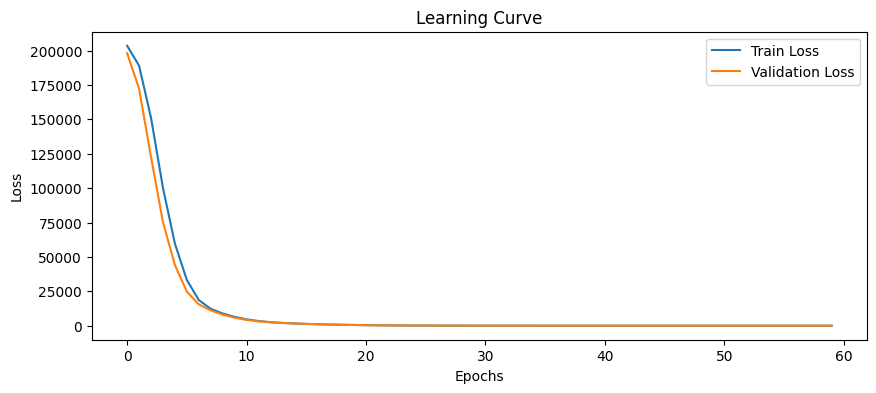

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Get the model weights

In [37]:
weights = model.get_weights()
weights

[array([[-0.8731597 ,  0.07681026, -0.18316057,  0.7849679 , -0.06839156,
          0.4786221 , -0.15295732, -0.85306567],
        [-0.5813326 ,  0.19583449,  0.8529109 ,  0.3469488 ,  0.28359488,
         -0.7224998 ,  0.16392446, -0.8323387 ],
        [ 0.4648794 ,  0.7540654 , -0.22852361,  0.42083463, -0.5201614 ,
         -0.24752739, -0.45878622, -0.10092864],
        [ 0.0353277 , -0.33843794, -0.04341862,  0.23645045,  0.99632686,
         -0.7315612 , -0.3754373 ,  0.00390529]], dtype=float32),
 array([2.8127441, 2.7162817, 2.6265247, 2.8446934, 3.1695735, 2.8513303,
        2.570217 , 2.7374873], dtype=float32),
 array([[1.8503457, 1.445269 , 1.5803684, 1.2919582],
        [1.7116904, 2.2418628, 1.9684464, 2.082594 ],
        [1.7718685, 1.426919 , 1.5865881, 2.1512113],
        [1.7375077, 2.3525548, 1.2856374, 1.5399872],
        [2.019112 , 2.3418107, 1.9599   , 1.7852004],
        [2.2353082, 1.2920196, 1.0680417, 2.3609815],
        [2.1735082, 1.7246062, 1.8986499, 1.86

# Step 7 - Model evaluation

In [38]:
train_mse, train_mae = model.evaluate(xtrain, ytrain)
print(f"Train MSE : {train_mse:.2f}")
print(f"Train MAE : {train_mae:.2f}")

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20.4752 - mae: 3.6372
Train MSE : 20.83
Train MAE : 3.64


In [39]:
test_mse, test_mae = model.evaluate(xtest, ytest)
print(f"Test MSE : {test_mse:.2f}")
print(f"Test MAE : {test_mae:.2f}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.1902 - mae: 3.6313
Test MSE : 21.14
Test MAE : 3.71


In [40]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [41]:
def evaluate_model(model, x, y):
  ypred = model.predict(x)
  rmse = root_mean_squared_error(y, ypred)
  mae = mean_absolute_error(y, ypred)
  mape = mean_absolute_percentage_error(y, ypred)
  r2 = r2_score(y, ypred)
  print(f"RMSE : {rmse:.2f}")
  print(f"MAE : {mae:.2f}")
  print(f"MAPE : {mape:.2%}")
  print(f"R2 : {r2:.2%}")

In [42]:
print("Training Results : ")
evaluate_model(model, xtrain, ytrain)

Training Results : 
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RMSE : 4.56
MAE : 3.64
MAPE : 0.80%
R2 : 92.75%


In [43]:
print("Testing Results : ")
evaluate_model(model, xtest, ytest)

Testing Results : 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
RMSE : 4.60
MAE : 3.71
MAPE : 0.82%
R2 : 92.99%


# From above results the model is good because r2 score > 0.8 for both train and test

# Step 8 - Out of Sample prediction

In [44]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv


In [45]:
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [46]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [47]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [48]:
xnew_pre.shape

(100, 4)

In [50]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([[445.9009 ],
       [440.97046],
       [431.46637],
       [440.8798 ],
       [473.35922]], dtype=float32)

In [51]:
xnew["PE_pred"] = preds.round(2)

In [52]:
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,445.899994
1,28.88,54.89,1007.16,46.60,440.970001
2,27.89,73.21,1001.32,85.88,431.470001
3,25.69,62.26,1011.38,74.08,440.880005
4,12.16,40.81,1025.79,70.97,473.359985
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,438.299988
96,11.78,39.96,1011.37,82.95,471.519989
97,5.62,41.38,1020.91,86.21,482.940002
98,24.96,74.99,1008.25,80.52,437.920013


In [53]:
xnew.to_csv("results.csv", index=False)

# Step 9 - Saving and loading model

In [54]:
model.save("plant_model.keras")

In [55]:
import joblib

joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

# Loading preprocessor and model

In [56]:
p = joblib.load("pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [57]:
from tensorflow.keras.models import load_model

m = load_model("plant_model.keras")
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)

In [58]:
m.evaluate(xtrain, ytrain)

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20.4752 - mae: 3.6372


[20.832847595214844, 3.643491268157959]

In [59]:
m.evaluate(xtest, ytest)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.1902 - mae: 3.6313


[21.144893646240234, 3.705583095550537]